# Datamining Class

# 차원 축소

In [2]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pylab as plt

## 데이터 요약과 차원 축소
### 데이터 요약
* 데이터 요약은 데이터 탐색의 중요한 구성 요소
* 요약 통계(평균, 중앙값 등) 및 그래픽 요약
* 일반적인 요약 통계
- 평균, 중앙값, 최소값, 최댓값, 표준편차, 개수 및 백분율

### 차원 축소
* 고차원의 원본 데이터를 저차원의 부분 공간으로 투영하여 데이터를 축소하는 방법
* 정확도의 희생을 최소로 하여 독립 변수 또는 입력 변수의 차원을 축소하는 방법을 찾는 것
* 요인 선택 또는 특징 추출
* 데이터의 정보를 더 작은 하위 집합으로 압축하는 데 유용
* 유사한 범주를 결합하여 범주형 변수를 줄일 수 있음

### 차원 축소 방법
* 주어진 데이터에 도메인 지식을 적용해 범주를 제거하거나 결합하기
* 데이터 요약을 사용해 변수 간 중복 정보를 검출하고 불필요한 변수 및 범주를 제거하거나 합치기
* 데이터 변환 기술을 사용해 범주형 변수를 수치형 변수로 변환하기
* 주성분 분석(PCA) 같은 자동화된 차원 축소 기술을 사용하기
- 주성분 분석은 원래 수치 데이터셋을 더 적은 변수에 대부분의 원래 정보를 포함하는 원래 데이터의 더 작은 가중 셋으로 변환

In [4]:
boston_df = pd.read_csv('https://raw.githubusercontent.com/reisanar/datasets/master/BostonHousing.csv')
boston_df = boston_df.rename(columns = {'CAT. MEDV': 'CAT_MEDV'})
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT_MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2,1


In [5]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT_MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806,0.166008
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104,0.372456
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000,0.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000,0.000000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000,0.000000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000,0.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000,1.000000


In [8]:
print('Mean: ', boston_df.CRIM.mean())
print('Std. dev', 'boston_df.CRIM.std()')
print('Min: ', 'boston_df.CRIM.min()')
print('Max: ', 'boston_df.CRIM.max()')
print('Median: ', 'boston_df.CRIM.median()')
print('Length: ', len(boston_df.CRIM),'\n')

print('Number of missing Values : ', boston_df.CRIM.isnull().sum())

Mean:  3.613523557312254
Std. dev boston_df.CRIM.std()
Min:  boston_df.CRIM.min()
Max:  boston_df.CRIM.max()
Median:  boston_df.CRIM.median()
Length:  506 

Number of missing Values :  0


In [11]:
# 요약 통계
pd.DataFrame({'mean' : boston_df.mean(),
              'sd': boston_df.std(),
              'min': boston_df.min(),
              'max': boston_df.max(),
              'median': boston_df.median(),
              'length': len(boston_df),
              'miss.val': boston_df.isnull().sum()})

,mean,sd,min,max,median,length,miss.val
CRIM,3.613524,8.601545,0.00632,88.9762,0.25651,506,0
ZN,11.363636,23.322453,0.00000,100.0000,0.00000,506,0
INDUS,11.136779,6.860353,0.46000,27.7400,9.69000,506,0
CHAS,0.069170,0.253994,0.00000,1.0000,0.00000,506,0
NOX,0.554695,0.115878,0.38500,0.8710,0.53800,506,0
RM,6.284634,0.702617,3.56100,8.7800,6.20850,506,0
AGE,68.574901,28.148861,2.90000,100.0000,77.50000,506,0
DIS,3.795043,2.105710,1.12960,12.1265,3.20745,506,0
RAD,9.549407,8.707259,1.00000,24.0000,5.00000,506,0
TAX,408.237154,168.537116,187.00000,711.0000,330.00000,506,0


In [12]:
boston_df.corr().round(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT_MEDV
CRIM,1.000,-0.200,0.407,-0.056,0.421,-0.219,0.353,-0.380,0.626,0.583,0.290,0.456,-0.388,-0.152
ZN,-0.200,1.000,-0.534,-0.043,-0.517,0.312,-0.570,0.664,-0.312,-0.315,-0.392,-0.413,0.360,0.365
INDUS,0.407,-0.534,1.000,0.063,0.764,-0.392,0.645,-0.708,0.595,0.721,0.383,0.604,-0.484,-0.366
CHAS,-0.056,-0.043,0.063,1.000,0.091,0.091,0.087,-0.099,-0.007,-0.036,-0.122,-0.054,0.175,0.109
NOX,0.421,-0.517,0.764,0.091,1.000,-0.302,0.731,-0.769,0.611,0.668,0.189,0.591,-0.427,-0.233
RM,-0.219,0.312,-0.392,0.091,-0.302,1.000,-0.240,0.205,-0.210,-0.292,-0.356,-0.614,0.695,0.641
AGE,0.353,-0.570,0.645,0.087,0.731,-0.240,1.000,-0.748,0.456,0.506,0.262,0.602,-0.377,-0.191
DIS,-0.380,0.664,-0.708,-0.099,-0.769,0.205,-0.748,1.000,-0.495,-0.534,-0.232,-0.497,0.250,0.119
RAD,0.626,-0.312,0.595,-0.007,0.611,-0.210,0.456,-0.495,1.000,0.910,0.465,0.489,-0.382,-0.198
TAX,0.583,-0.315,0.721,-0.036,0.668,-0.292,0.506,-0.534,0.910,1.000,0.461,0.544,-0.469,-0.274


In [13]:
boston_df.CHAS.value_counts()
# value_counts 변수 하나로 취합 가능
# 35개 지역은 CHAS 값이 1 -> 찰스 강 경계에 인접

0    471
1     35
Name: CHAS, dtype: int64

In [14]:
# pd.cut 메서드를 이용하여 변수에 대해 크기 1의 bin을 생성
# 기본적으로 method는 변수형 변수를 생성
# 인수 labes = False 는 대신 정수를 결정 예) 6
# pd.cut(X, bins, labels), bins = [start, end] => (미포함, 포함)
# bin 구간 대비 작거나 큰 수, if bin 첫 번째 구간보다 작으면 --> NaN, 마지막 구간보다 크면 --> NaN
boston_df['RM_bin'] = pd.cut(boston_df.RM, range(0,10), labels = False)
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT_MEDV,RM_bin
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0,0,6
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6,0,6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7,1,7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4,1,6
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2,1,7


In [15]:
# 비닝된 RM 및 CHAS로 MEDV의 평균 계산
# groupby 방법을 사용하여 데이터 프레임을 groupping한 다음 분석을 MEDV로 제한하고 각 그룹에 대한 평균 결정
boston_df.groupby(['RM_bin', 'CHAS'])['MEDV'].mean()

RM_bin  CHAS
3       0       25.300000
4       0       15.407143
5       0       17.200000
        1       22.218182
6       0       21.769170
        1       25.918750
7       0       35.964444
        1       44.066667
8       0       45.700000
        1       35.950000
Name: MEDV, dtype: float64

## 상관 분석
* 변수의 중복 탐지에 좋음
* 상관 계수 표에 대한 히트맵을 사용해 강한 상관관계가 있는 변수들을 쉽게 식별 가능

## 피벗 테이블

In [17]:
# pivot_table() 함수를 이용해 피벗 테이블 작성
pd.pivot_table(boston_df, values = 'MEDV', index = ['RM_bin'], columns = ['CHAS'], aggfunc = np.mean, margins = True)

CHAS,0,1,All
RM_bin,,,
3,25.300000,NaN,25.300000
4,15.407143,NaN,15.407143
5,17.200000,22.218182,17.551592
6,21.769170,25.918750,22.015985
7,35.964444,44.066667,36.917647
8,45.700000,35.950000,44.200000
All,22.093843,28.440000,22.532806


In [18]:
# 찰스강과 접하지 않는 방이 8개인 지역은 medv = 45.7

In [19]:
col = ['Machine', 'Country','Grade', 'Price', 'Count']
data = [['TV', 'Korea', 'A', 1000, 3], ['TV', 'Korea', 'B', 800,8], ['TV', 'Korea', 'B', 800,2], ['TV', 'Japan', 'A', 1300, 5], ['TV', 'Japan', 'A', 1300, 1], ['PC', 'Korea', 'B', 1500, 6], ['PC', 'Korea', 'A', 2000, 9], ['PC', 'Japan', 'A', 3000, 3], ['PC', 'Japan', 'B', 2500, 3]]
df = pd.DataFrame(data = data, columns = col)
print(df)

  Machine Country Grade  Price  Count
0      TV   Korea     A   1000      3
1      TV   Korea     B    800      8
2      TV   Korea     B    800      2
3      TV   Japan     A   1300      5
4      TV   Japan     A   1300      1
5      PC   Korea     B   1500      6
6      PC   Korea     A   2000      9
7      PC   Japan     A   3000      3
8      PC   Japan     B   2500      3


In [24]:
# index를 Machine, Country로 하고 columns를 Grade로 설정하고 Count값들을 np.sum으로 합계를 계산한 결과를 Pivot_table()를 사용하여 출력하라.
pd.pivot_table(df, values = 'Count' ,index = ['Machine', 'Country'], columns=['Grade'], aggfunc = np.sum, margins = True)

Grade               A     B  All
Machine Country                 
PC      Japan     3.0   3.0    6
        Korea     9.0   6.0   15
TV      Japan     6.0   NaN    6
        Korea     3.0  10.0   13
All              21.0  19.0   40

## 범주 축소
### 교차 분석표(Crosstab)
* pandas에서 범주형 데이터 2개를 비교 분석할 때 유용한 표

In [25]:
# Crosstab :
# pd.crosstab(index, columns, values = None, rownames = None, colnames = None, aggfunc = None, margins = False, margins_name = 'ALL', dropna = True, normalize = None)
# index (행으로 그룹화할 값), columns (열로 그룹화할 값)은 필수 입력
# 두 변수의 교차 표 작성을 위해 pd.crosstab메소드를 사용
tbl = pd.crosstab(boston_df.CAT_MEDV, boston_df.ZN)
propTbl = tbl/tbl.sum()
propTbl.round(2)

ZN,0.0,12.5,17.5,18.0,20.0,21.0,22.0,25.0,28.0,30.0,...,55.0,60.0,70.0,75.0,80.0,82.5,85.0,90.0,95.0,100.0
CAT_MEDV,,,,,,,,,,,,,,,,,,,,,
0,0.91,1.0,0.0,1.0,0.24,1.0,0.9,1.0,1.0,1.0,...,0.67,0.75,1.0,0.33,0.67,0.5,1.0,0.0,0.0,0.0
1,0.09,0.0,1.0,0.0,0.76,0.0,0.1,0.0,0.0,0.0,...,0.33,0.25,0.0,0.67,0.33,0.5,0.0,1.0,1.0,1.0


C:\Users\User\AppData\Local\Temp\ipykernel_4592\4007499202.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(x) for x in ax.get_yticks()])


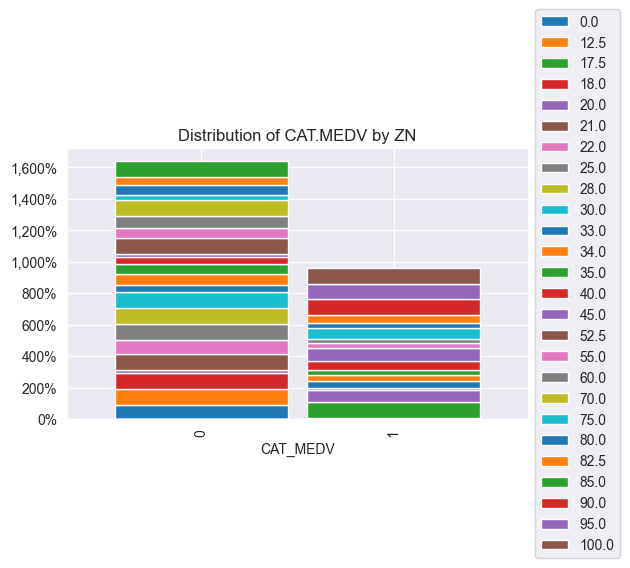

In [26]:
# 누적 막대 차트에서 비율을 플로팅
ax = propTbl.plot(kind = 'bar', stacked = True, width = 0.9)
ax.set_yticklabels(['{:,.0%}'.format(x) for x in ax.get_yticks()])
plt.title('Distribution of CAT.MEDV by ZN')
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.tight_layout()
plt.show()
# x축, y축 설정이 거꾸로 되어 있다

C:\Users\User\AppData\Local\Temp\ipykernel_4592\4246108893.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(x) for x in ax.get_yticks()])


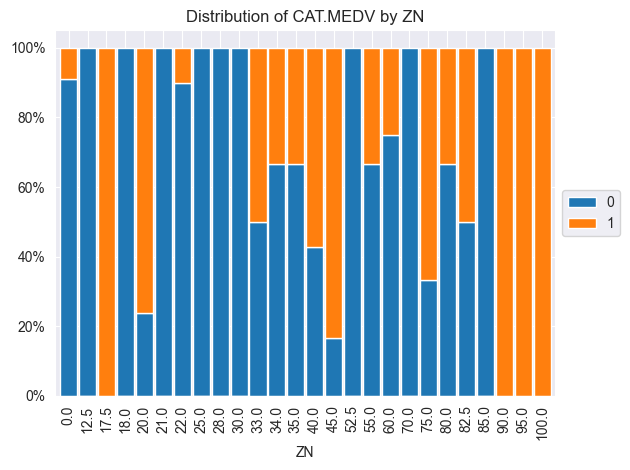

In [27]:
ax = propTbl.transpose().plot(kind = 'bar', stacked = True, width = 0.9)
ax.set_yticklabels(['{:,.0%}'.format(x) for x in ax.get_yticks()])
plt.title('Distribution of CAT.MEDV by ZN')
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.tight_layout()
plt.show()

# 주성분 분석(PCA)

In [28]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

cereals_df = pd.read_csv('https://raw.githubusercontent.com/reisanar/datasets/master/Cereals.csv')
cereals_df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33,68.402973
1,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.425505
3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,93.704912
4,Almond_Delight,R,C,110,2,2,200,1.0,14.0,8.0,NaN,25,3,1.0,0.75,34.384843


In [32]:
# calories와 weight 열 추출
c_data = cereals_df[['calories', 'weight']]

# 정규화
scaler = StandardScaler()
nc_data = scaler.fit_transform(c_data)

In [30]:
# 주성분 분석
pca = PCA(n_components=2)
pnc_data = pca.fit_transform(nc_data)

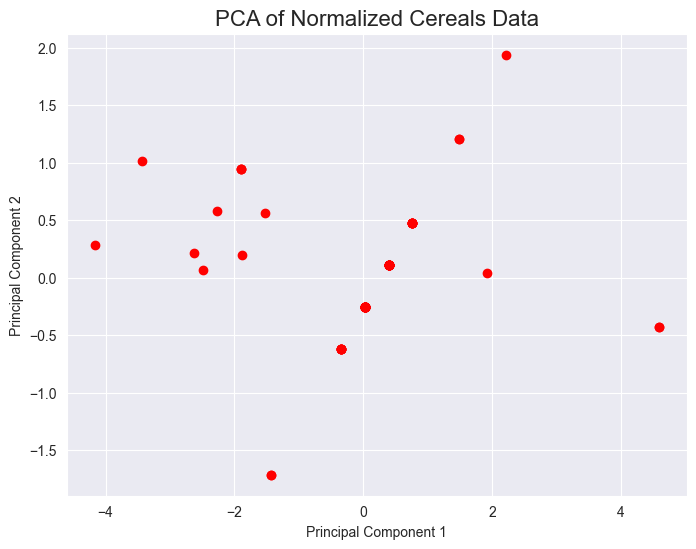

In [31]:
# 결과 시각화
plt.figure(figsize=(8, 6))
plt.scatter(pnc_data[:, 0], pnc_data[:, 1], c='red')
plt.title('PCA of Normalized Cereals Data', fontsize=16)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

## 성능 평가

In [33]:
import math
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pylab as plt
!pip install dmba
from dmba import regressionSummary, classificationSummary
from dmba import liftChart, gainsChart

You should consider upgrading via the 'c:\users\user\.conda\envs\condapractice\python.exe -m pip install --upgrade pip' command.


### 예측 성능 평가
* 검증 데이터를 기반으로 모든 케이스에 대해 예측 정확도를 평가해 학습 데이터보다 좀 더 객관적인 근거 제공

### 지도 학습에서 관심 결과
* 수치 값 : 결과 변수가 수치형일 때(주택 가격)
* 클래스 소속도 : 결과 변수가 범주형일 때(구매자/비구매자)
* 경향 : 결과 변수가 범주형일 떄(채무 불이행 경향) 클래스 소속도의 확률

### 예측 정확성 판단 척도
* MAE(평균 절대 오차/편차) = 평균 절대 오차의 규모
* 평균 오차 = = 오차의 부호를 유지한다는 점을 제외하면 MAE와 유사해, 음의 오차가 동일한 규모의 양의 오차를 상쇄한다. 따라서 이 값은 예측이 평균적으로 결과 변수의 예측을 넘어서는지 미달되는지를 나타낸다.
* MPE(평균 백분율 오차) = 방향을 고려해 예측이 실제값에서 평균적으로 얼마나 벗어나는지에 대한 백분율 점수를 알려준다.
* MAPE(평균 절대 백분율 오차) = 실제값에서 평균적으로 얼마나 벗어나는지에 대한 백분율 점수를 알려준다.
* RMSE(근의 평균 제곱 오차) = 학습 데이터 대신 검증 데이터로 계산된 것만 빼면 선형 회귀 분석에서 추정값의 표준 오차와 유사하다. 결과 변수와 단위가 같다.

### 모델의 정확성 척도

In [5]:
# 도요타 자동차 가격에 대한 모델의 예측 오차 척도. 학습과 검증
# 정확한 척도를 위한 파이썬 코드

# 데이터 프레임을 로드하고 회귀 분석을 위해 열을 선택
car_df = pd.read_csv('https://raw.githubusercontent.com/reisanar/datasets/master/ToyotaCorolla.csv')
car_df.head()

,model,price,age_08_04,mfg_month,mfg_year,km,fuel_type,hp,met_color,color,...,powered_windows,power_steering,radio,mistlamps,sport_model,backseat_divider,metallic_rim,radio_cassette,parking_assistant,tow_bar
0,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,Blue,...,1,1,0,0,0,1,0,0,0,0
1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,Silver,...,0,1,0,0,0,1,0,0,0,0
2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,Blue,...,0,1,0,0,0,1,0,0,0,0
3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,Black,...,0,1,0,0,0,1,0,0,0,0
4,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,Black,...,1,1,0,1,0,1,0,0,0,0


In [8]:
# 출력 변수와 텍스트 열을 제거하여 예측 변수 목록을 만듦
excludeColumns = ('price', 'id', 'model', 'fuel_type', 'color')
predictors = [s for s in car_df.columns if s not in excludeColumns]
outcome = 'price'

# 데이터 분할
X = car_df[predictors]
y = car_df[outcome]


### 학습과 검증 성능의 비교
* 학습 데이터셋에서 오차는 모델이 얼마나 잘 적합되었는지 알려줌
* 반면, 검증 데이터셋에서 오차(예측 오차)는 모델이 새로운 데이터를 예측하는 성능(예측 성능)을 측정
* 모델은 학습 데이터셋을 사용해 적합되었기 때무에 학습 오차가 검증 오차보다 작고, 복잡한 모델일수록 학습 데이터에 과적합될 가능성이 더 큼

In [11]:
# 학습 데이터 셋과 검증 데이터 셋에 대한 도요타 가격 예측 오차의 히스토그램과 박스 플롯

### 누적 이득과 리프트 차트
* 모델의 예측 성능을 예측 변수들을 사용하지 않는 기준 모델과 비교
* 새로운 레코드에서 단지 누적 예측 값이 가장 큰 레코드들의 부분집합을 찾을 때 예측 성능을 시각적으로 측정하는 방법
* 예측값이 높은 값부터 낮은 값으로 정렬된 관심 레코드드의 실제 값들을 누적시키고 누적된 레코드의 수(x-축 값)에 대한 함수로 y-축에 그 누적 값(=이득)을 그리는 것이 누적 이득 차트(곡선)
* 누적 이득 차트가 벤치마크대각선에서 멀리 떨어질수록 모델이 높은 결과 값의 레코드들과 낮은 결과 값의 레코드들을 더 잘 분리함
* 같은 정보가 십분위 리프트 차트에서도 나올 수 있는데, 이 차트는 정렬된 레코드들을 10개의 십분위로 그룹화하고 각 십분위에 대해 나이브 벤치마크 이득에 대하 모델의 이득 비(리프트라고 불림)를 보여줌

### 분류기 성능의 판단
#### 나이브 규칙
* 예측 변수가 가지는 모든 정보(x1, x2, ... xp)를 무시하고 주어진 레코드를 m개 클래스 중 하나로 분류하는 규칙
* 해당 레코드를 다수 클래스의 멤버로 분류
* 종종 벤치마크로 사용됨
* 분류를 위한 나이브 규칙은 추가적인 예측 변수 정보는 배제하고 y정보에만 의존

#### 클래스 분리
* 클래스들이 예측 변수 정보로 잘 분리? -> 작은 데이터셋으로도 충분히 좋은 분류기
* 고수준 분리는 예측 변수를 사용해 오류가 낮음을 의미
* 저수준 분리는 나이브 규칙서 크게 개선되지 않음을 의미

#### 정오 행렬(Confusion matrix)
* 특정 데이터셋에 대해 산출하는 정확한 분류와 부정확한 분류를 요약
* 정오 행렬의 행과 열을 각각 예측 클래스와 진(실제)클래스에 대응